In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/Diabetic_Retinopathy/train

/content/drive/My Drive/Diabetic_Retinopathy/train


In [3]:
# from google.colab import files
# files.upload()

In [4]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !rm kaggle.json

In [5]:
# !kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification

In [6]:
# from zipfile import ZipFile
# file_name="/content/drive/MyDrive/eyedisease/eye-diseases-classification.zip"

# with ZipFile(file_name,'r') as zip:
#   zip.extractall()
#   print('Done')

In [7]:
import os

from fastai.vision.all import *
from fastai.vision import *


import pandas as pd

In [8]:
DATASET_PATH = '/content/drive/MyDrive/Diabetic_Retinopathy/train'


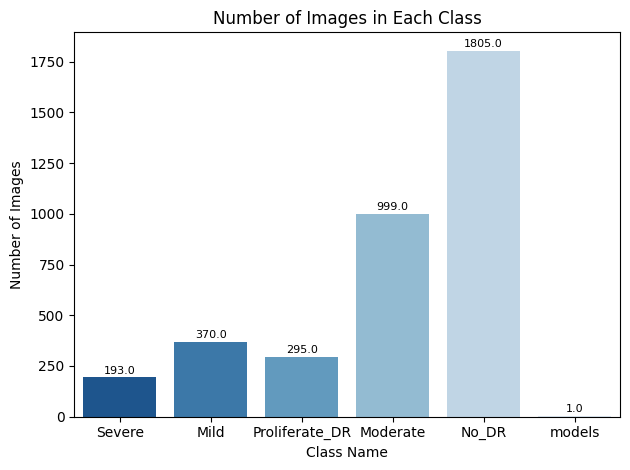

In [9]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Get the folder names and image counts
class_names = []
image_counts = []

# Iterate over the folders in the dataset directory
for folder in os.listdir(DATASET_PATH):
    # Get the full path of the folder
    folder_path = os.path.join(DATASET_PATH, folder)

    # Check if the path is a directory
    if os.path.isdir(folder_path):
        # Get the number of images in the folder
        num_images = len(os.listdir(folder_path))

        # Append the folder name and image count to the lists
        class_names.append(folder)
        image_counts.append(num_images)

# Set the color palette to use only blue
sns.set_palette("Blues_r")

# Create a bar plot using Seaborn
ax = sns.barplot(x=class_names, y=image_counts)

# Set labels and title
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')

# Set font size for folder names on x-axis
plt.xticks(fontsize=10)

# Display the count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

# Display the plot
plt.tight_layout()
plt.show()

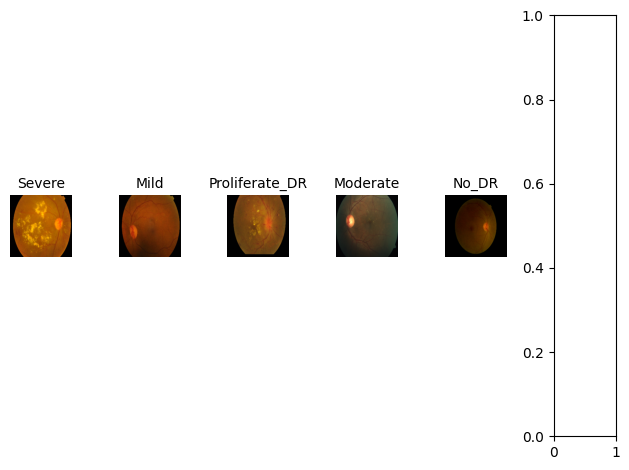

In [10]:
from PIL import Image

# Path to the dataset folder
# Create a figure and subplot grid
fig, axs = plt.subplots(1, len(os.listdir(DATASET_PATH)))

# Iterate over the folders in the dataset directory
for i, folder in enumerate(os.listdir(DATASET_PATH)):
    # Get the full path of the folder
    folder_path = os.path.join(DATASET_PATH, folder)

    # Check if the path is a directory
    if os.path.isdir(folder_path):
        # Get a list of image files in the folder
        image_files = os.listdir(folder_path)

        # Check if there is at least one image in the folder
        if len(image_files) > 1:
            # Get the second image file path
            image_path = os.path.join(folder_path, image_files[1])

            # Open and display the image in the corresponding subplot
            image = Image.open(image_path)
            axs[i].imshow(image)
            axs[i].axis('off')

            # Display the folder name beneath the image
            axs[i].set_title(folder, fontsize=10, pad=5)

# Adjust spacing between subplots
plt.tight_layout()

# Display the images
plt.show()


In [11]:
class_names = []
for folder_name in os.listdir(DATASET_PATH):
    class_names.append(folder_name)

In [12]:
class_names

['Severe', 'Mild', 'Proliferate_DR', 'Moderate', 'No_DR', 'models']

In [13]:
image_paths = []
labels = []

for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{DATASET_PATH}/{class_name}')
    for image_name in image_names:
        image_path = f'{DATASET_PATH}/{class_name}/{image_name}'

        image_paths.append(image_path)
        labels.append(class_name)


In [14]:
No_images_per_class = []
Class_name = []
for i in os.listdir(DATASET_PATH):
  train_class = os.listdir(os.path.join(DATASET_PATH, i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in Severe = 193 

Number of images in Mild = 370 

Number of images in Proliferate_DR = 295 

Number of images in Moderate = 999 

Number of images in No_DR = 1805 

Number of images in models = 1 



In [15]:
df = pd.DataFrame(
    {
        'name': image_paths,
        'label': labels
    }
)

In [16]:
dls = ImageDataLoaders.from_folder(
    path=DATASET_PATH,
    item_tfms=Resize(256),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    valid_pct=0.2,
    )

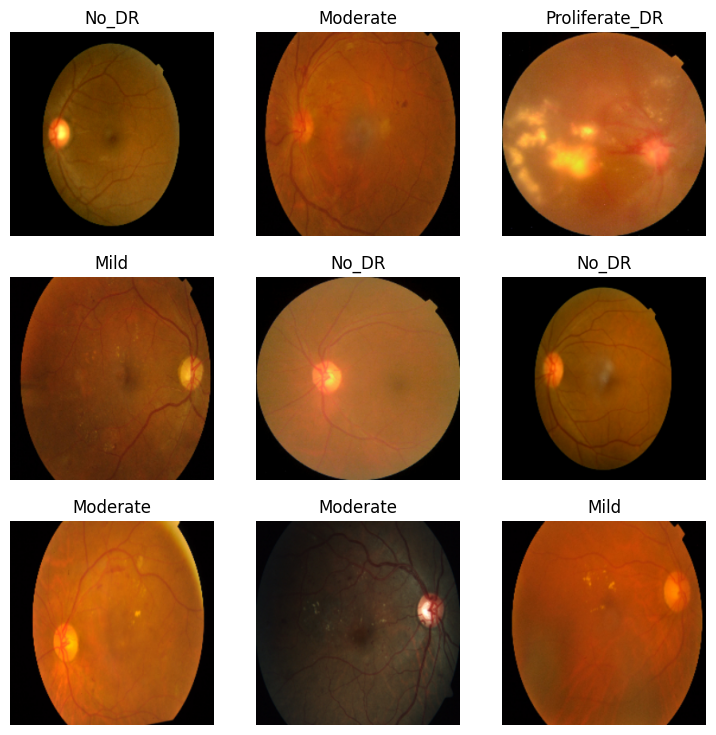

In [17]:
dls.show_batch()

In [18]:
model_resnet101 = vision_learner(
    dls=dls,
    arch=models.resnet101,
    metrics=[accuracy, error_rate]
)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 95.9MB/s]


In [19]:
model_resnet18 = vision_learner(
    dls=dls,
    arch=models.resnet18,
    metrics=[accuracy, error_rate]
)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 197MB/s]


In [20]:
model_resnet34 = vision_learner(
    dls=dls,
    arch=models.resnet34,
    metrics=[accuracy, error_rate]
)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 92.9MB/s]


In [21]:
model_resnet50 = vision_learner(
    dls=dls,
    arch=models.resnet50,
    metrics=[accuracy, error_rate]
)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 95.7MB/s]


In [22]:
model_regnet = vision_learner(
    dls=dls,
    arch=models.regnet_y_400mf,
    metrics=[accuracy, error_rate]
)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RegNet_Y_400MF_Weights.IMAGENET1K_V1`. You can also use `weights=RegNet_Y_400MF_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/regnet_y_400mf-c65dace8.pth" to /root/.cache/torch/hub/checkpoints/regnet_y_400mf-c65dace8.pth
100%|██████████| 16.8M/16.8M [00:00<00:00, 116MB/s] 


In [23]:
model_wideresnet = vision_learner(
    dls=dls,
    arch=models.wide_resnet50_2,
    metrics=[accuracy, error_rate]
)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to /root/.cache/torch/hub/checkpoints/wide_resnet50_2-95faca4d.pth
100%|██████████| 132M/132M [00:00<00:00, 178MB/s]


In [24]:
model_resnet101.fine_tune(
    epochs=100,
    cbs=[EarlyStoppingCallback(monitor='accuracy', min_delta=0.01, patience=5),
         SaveModelCallback(monitor='accuracy', min_delta=0.01)]
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.155071,0.834355,0.726776,0.273224,06:22


Better model found at epoch 0 with accuracy value: 0.7267759442329407.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.691425,0.626721,0.792350,0.207650,01:11
1,0.494194,0.618143,0.773224,0.226776,01:10
2,0.352325,0.597934,0.799180,0.200820,01:10
3,0.257931,0.652585,0.808743,0.191257,01:10
4,0.219038,0.790541,0.801913,0.198087,01:11
5,0.242022,0.804946,0.795082,0.204918,01:11
6,0.203489,0.819840,0.793716,0.206284,01:11
7,0.221697,1.007490,0.792350,0.207650,01:11
8,0.190050,0.778246,0.818306,0.181694,01:10


Better model found at epoch 0 with accuracy value: 0.7923497557640076.
Better model found at epoch 3 with accuracy value: 0.8087431788444519.
No improvement since epoch 3: early stopping


In [25]:
model_resnet18.fine_tune(
    epochs=100,
    cbs=[EarlyStoppingCallback(monitor='accuracy', min_delta=0.01, patience=5),
         SaveModelCallback(monitor='accuracy', min_delta=0.01)]
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.111687,0.887604,0.725410,0.274590,00:26


Better model found at epoch 0 with accuracy value: 0.7254098653793335.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.791024,0.648450,0.781421,0.218579,00:27
1,0.550670,0.636683,0.780055,0.219945,00:27
2,0.416433,0.688236,0.789617,0.210383,00:26
3,0.364065,0.759800,0.778689,0.221311,00:26
4,0.259315,0.802510,0.786885,0.213115,00:27
5,0.205211,0.799284,0.780055,0.219945,00:27


Better model found at epoch 0 with accuracy value: 0.7814207673072815.
No improvement since epoch 0: early stopping


In [26]:
model_resnet34.fine_tune(
    epochs=100,
    cbs=[EarlyStoppingCallback(monitor='accuracy', min_delta=0.01, patience=5),
         SaveModelCallback(monitor='accuracy', min_delta=0.01)]
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.199673,0.829311,0.729508,0.270492,00:28


Better model found at epoch 0 with accuracy value: 0.7295082211494446.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.767904,0.578465,0.804645,0.195355,00:30
1,0.576569,0.586645,0.789617,0.210383,00:30
2,0.395457,0.618181,0.789617,0.210383,00:30
3,0.299106,0.663644,0.795082,0.204918,00:30
4,0.283020,0.764322,0.775956,0.224044,00:29
5,0.227884,0.824060,0.782787,0.217213,00:29


Better model found at epoch 0 with accuracy value: 0.8046448230743408.
No improvement since epoch 0: early stopping


In [27]:
model_resnet50.fine_tune(
    epochs=100,
    cbs=[EarlyStoppingCallback(monitor='accuracy', min_delta=0.01, patience=5),
         SaveModelCallback(monitor='accuracy', min_delta=0.01)]
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.172638,0.872623,0.747268,0.252732,00:34


Better model found at epoch 0 with accuracy value: 0.7472677826881409.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.657669,0.605567,0.793716,0.206284,00:46
1,0.409765,0.625409,0.797814,0.202186,00:47
2,0.374056,0.738790,0.796448,0.203552,00:45
3,0.272041,0.748825,0.797814,0.202186,00:45
4,0.200221,0.746828,0.814208,0.185792,00:45
5,0.179560,0.738379,0.807377,0.192623,00:46
6,0.200027,0.891963,0.788251,0.211749,00:45
7,0.170839,0.921553,0.775956,0.224044,00:46
8,0.169179,0.935106,0.800546,0.199454,00:45
9,0.165728,0.875322,0.803279,0.196721,00:47


Better model found at epoch 0 with accuracy value: 0.7937158346176147.
Better model found at epoch 4 with accuracy value: 0.8142076730728149.
No improvement since epoch 4: early stopping


In [28]:
model_regnet.fine_tune(
    epochs=100,
    cbs=[EarlyStoppingCallback(monitor='accuracy', min_delta=0.01, patience=5),
         SaveModelCallback(monitor='accuracy', min_delta=0.01)]
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.214471,0.951799,0.696721,0.303279,00:30


Better model found at epoch 0 with accuracy value: 0.6967213153839111.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.813374,0.714823,0.741803,0.258197,00:33
1,0.735353,0.683831,0.752732,0.247268,00:35
2,0.671843,0.657956,0.762295,0.237705,00:34
3,0.649799,0.643850,0.756831,0.243169,00:35
4,0.603014,0.648318,0.760929,0.239071,00:34
5,0.564708,0.636085,0.770492,0.229508,00:35
6,0.582432,0.636895,0.769126,0.230874,00:34
7,0.472661,0.636336,0.770492,0.229508,00:35
8,0.479556,0.642614,0.775956,0.224044,00:34
9,0.432873,0.621122,0.786885,0.213115,00:34


Better model found at epoch 0 with accuracy value: 0.7418032884597778.
Better model found at epoch 1 with accuracy value: 0.7527322173118591.
Better model found at epoch 5 with accuracy value: 0.7704917788505554.
Better model found at epoch 9 with accuracy value: 0.7868852615356445.
No improvement since epoch 9: early stopping


In [29]:
model_wideresnet.fine_tune(
    epochs=100,
    cbs=[EarlyStoppingCallback(monitor='accuracy', min_delta=0.01, patience=5),
         SaveModelCallback(monitor='accuracy', min_delta=0.01)]
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.152243,0.894917,0.730874,0.269126,00:55


Better model found at epoch 0 with accuracy value: 0.7308743000030518.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.773118,0.714086,0.775956,0.224044,01:21
1,0.558907,0.662000,0.786885,0.213115,01:20
2,0.494066,0.716584,0.754098,0.245902,01:20
3,0.400718,0.756500,0.770492,0.229508,01:21
4,0.323729,0.804571,0.785519,0.214481,01:20
5,0.238794,0.854085,0.781421,0.218579,01:20
6,0.229034,0.843381,0.775956,0.224044,01:22


Better model found at epoch 0 with accuracy value: 0.7759562730789185.
Better model found at epoch 1 with accuracy value: 0.7868852615356445.
No improvement since epoch 1: early stopping


In [30]:
# model_resnet101.show_results()

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [59]:
test_results_resnet18 = model_resnet18.validate(dl=dls.valid)
test_results_resnet34 = model_resnet34.validate(dl=dls.valid)
test_results_resnet50 = model_resnet50.validate(dl=dls.valid)
test_results_resnet101 = model_resnet101.validate(dl=dls.valid)
test_results_regnet = model_regnet.validate(dl=dls.valid)
test_results_wideresnet = model_wideresnet.validate(dl=dls.valid)

test_accuracy_resnet18 = test_results_resnet18[1]
test_accuracy_resnet34 = test_results_resnet34[1]
test_accuracy_resnet50 = test_results_resnet50[1]
test_accuracy_resnet101 = test_results_resnet101[1]
test_accuracy_regnet = test_results_regnet[1]
test_accuracy_wideresnet = test_results_wideresnet[1]

print("Test Accuracy - ResNet-18:", test_accuracy_resnet18)
print("Test Accuracy - ResNet-34:", test_accuracy_resnet34)
print("Test Accuracy - ResNet-50:", test_accuracy_resnet50)
print("Test Accuracy - ResNet-101:", test_accuracy_resnet101)
print("Test Accuracy - RegNet:", test_accuracy_regnet)
print("Test Accuracy - WideResNet:", test_accuracy_wideresnet)





Test Accuracy - ResNet-18: 0.7814207673072815
Test Accuracy - ResNet-34: 0.8046448230743408
Test Accuracy - ResNet-50: 0.8142076730728149
Test Accuracy - ResNet-101: 0.8087431788444519
Test Accuracy - RegNet: 0.7868852615356445
Test Accuracy - WideResNet: 0.7868852615356445


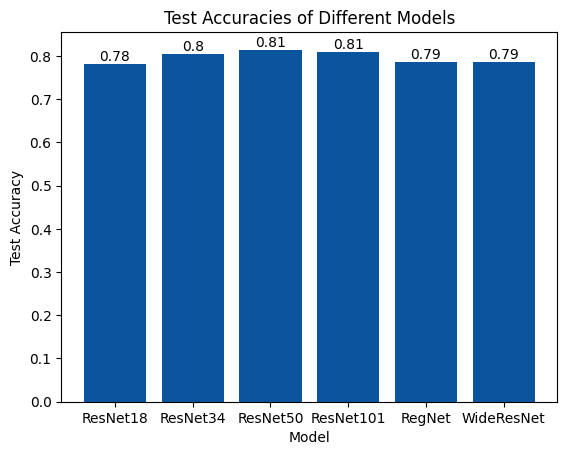

In [77]:
# Define the model names and corresponding test accuracies
model_names = ['ResNet18', 'ResNet34', 'ResNet50', 'ResNet101', 'RegNet', 'WideResNet']

test_accuracies = [test_accuracy_resnet18, test_accuracy_resnet34,
                   test_accuracy_resnet50, test_accuracy_resnet101,
                   test_accuracy_regnet, test_accuracy_wideresnet]

rounded_test_accuracies = [round(acc, 2) for acc in test_accuracies]

# Create a bar plot
plt.bar(model_names, test_accuracies)

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracies of Different Models')

# Add rounded numbers above each bar
for i in range(len(model_names)):
    plt.text(i, test_accuracies[i], str(rounded_test_accuracies[i]), ha='center', va='bottom')

# Display the plot
plt.show()



In [67]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
probs_resnet18 = model_resnet18.get_preds(dl=dls.valid)[0].numpy()
probs_resnet34 = model_resnet34.get_preds(dl=dls.valid)[0].numpy()
probs_resnet50 = model_resnet50.get_preds(dl=dls.valid)[0].numpy()
probs_resnet101 = model_resnet101.get_preds(dl=dls.valid)[0].numpy()
probs_regnet = model_regnet.get_preds(dl=dls.valid)[0].numpy()
probs_wideresnet = model_wideresnet.get_preds(dl=dls.valid)[0].numpy()




In [69]:
# Compute the fpr, tpr, and thresholds for each class
fpr_resnet18, tpr_resnet18, thresholds_resnet18 = roc_curve(binarized_labels.ravel(), probs_resnet18.ravel())
fpr_resnet34, tpr_resnet34, thresholds_resnet34 = roc_curve(binarized_labels.ravel(), probs_resnet34.ravel())
fpr_resnet50, tpr_resnet50, thresholds_resnet50 = roc_curve(binarized_labels.ravel(), probs_resnet50.ravel())
fpr_resnet101, tpr_resnet101, thresholds_resnet101 = roc_curve(binarized_labels.ravel(), probs_resnet101.ravel())
fpr_regnet, tpr_regnet, thresholds_regnet = roc_curve(binarized_labels.ravel(), probs_regnet.ravel())
fpr_wideresnet, tpr_wideresnet, thresholds_wideresnet = roc_curve(binarized_labels.ravel(), probs_wideresnet.ravel())


In [70]:
# Compute the AUC scores for each class
auc_resnet18 = auc(fpr_resnet18, tpr_resnet18)
auc_resnet34 = auc(fpr_resnet34, tpr_resnet34)
auc_resnet50 = auc(fpr_resnet50, tpr_resnet50)
auc_resnet101 = auc(fpr_resnet101, tpr_resnet101)
auc_regnet = auc(fpr_regnet, tpr_regnet)
auc_wideresnet = auc(fpr_wideresnet, tpr_wideresnet)

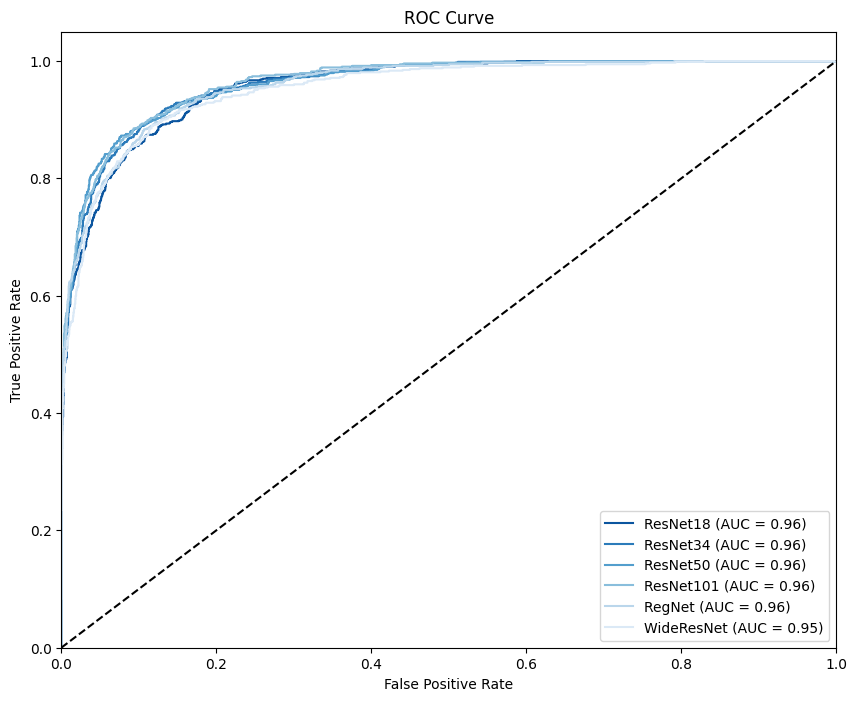

In [71]:
# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_resnet18, tpr_resnet18, label=f'ResNet18 (AUC = {auc_resnet18:.2f})')
plt.plot(fpr_resnet34, tpr_resnet34, label=f'ResNet34 (AUC = {auc_resnet34:.2f})')
plt.plot(fpr_resnet50, tpr_resnet50, label=f'ResNet50 (AUC = {auc_resnet50:.2f})')
plt.plot(fpr_resnet101, tpr_resnet101, label=f'ResNet101 (AUC = {auc_resnet101:.2f})')
plt.plot(fpr_regnet, tpr_regnet, label=f'RegNet (AUC = {auc_regnet:.2f})')
plt.plot(fpr_wideresnet, tpr_wideresnet, label=f'WideResNet (AUC = {auc_wideresnet:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [78]:
model_resnet101.export('eyedisease_resnet101.pkl')
model_resnet18.export('eyedisease_resnet18.pkl')
model_resnet34.export('eyedisease_resnet34.pkl')
model_resnet50.export('eyedisease_resnet50.pkl')
model_regnet.export('eyedisease_regnet.pkl')
model_wideresnet.export('eyedisease_wideresnet.pkl')

In [83]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the label encoder on the class names to obtain the mapping
label_encoder.fit(class_names)

# Encode the true labels using the label encoder
true_labels_encoded = label_encoder.transform(labels)

models = [
    ('ResNet18', model_resnet18),
    ('ResNet34', model_resnet34),
    ('ResNet50', model_resnet50),
    ('ResNet101', model_resnet101),
    ('RegNet', model_regnet),
    ('WideResNet', model_wideresnet)
]

# Initialize lists to store the results
precisions = []
recalls = []
f1_scores = []

for model_name, model in models:
    # Get the predicted labels and encode them using the label encoder
    predicted_labels = model.get_preds(dl=dls.valid)[0].argmax(dim=-1)
    predicted_labels_encoded = label_encoder.transform(predicted_labels)

    # Find the common classes between true and predicted labels
    common_classes = set(true_labels_encoded).intersection(set(predicted_labels_encoded))

    if len(common_classes) > 0:
        # Filter the true labels and predicted labels to include only common classes
        true_labels_filtered = [label for label in true_labels_encoded if label in common_classes]
        predicted_labels_filtered = [label for label in predicted_labels_encoded if label in common_classes]

        # Calculate precision, recall, and F1 score
        precision = precision_score(true_labels_filtered, predicted_labels_filtered, average='macro')
        recall = recall_score(true_labels_filtered, predicted_labels_filtered, average='macro')
        f1_score = f1_score(true_labels_filtered, predicted_labels_filtered, average='macro')

        # Append the results to the lists
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1_score)

        # Print the results for each model
        print(model_name)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1_score)
        print()
    else:
        print(f"No common classes found for {model_name}. Skipping evaluation.")

# Print the average results across all models
print("Average Results")
print("Average Precision:", sum(precisions) / len(precisions))
print("Average Recall:", sum(recalls) / len(recalls))
print("Average F1 Score:", sum(f1_scores) / len(f1_scores))


ValueError: ignored

In [96]:
predicted_labels = [str(label) for label in predicted_labels]
ground_truth_labels = [str(label) for label in ground_truth_labels]

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print(f1)

0.0


In [109]:
ground_truth_labels

['No_DR',
 'Mild',
 'Mild',
 'No_DR',
 'No_DR',
 'Proliferate_DR',
 'No_DR',
 'Moderate',
 'Moderate',
 'Proliferate_DR',
 'No_DR',
 'Moderate',
 'No_DR',
 'No_DR',
 'No_DR',
 'Mild',
 'Proliferate_DR',
 'Moderate',
 'No_DR',
 'Proliferate_DR',
 'Moderate',
 'Proliferate_DR',
 'Moderate',
 'Moderate',
 'No_DR',
 'Proliferate_DR',
 'No_DR',
 'No_DR',
 'Moderate',
 'Moderate',
 'No_DR',
 'No_DR',
 'No_DR',
 'Moderate',
 'Moderate',
 'No_DR',
 'Proliferate_DR',
 'Mild',
 'Proliferate_DR',
 'Moderate',
 'Proliferate_DR',
 'Moderate',
 'No_DR',
 'No_DR',
 'No_DR',
 'No_DR',
 'Severe',
 'No_DR',
 'Moderate',
 'Moderate',
 'No_DR',
 'Moderate',
 'Mild',
 'Severe',
 'Moderate',
 'Moderate',
 'No_DR',
 'No_DR',
 'Moderate',
 'Moderate',
 'Mild',
 'Moderate',
 'No_DR',
 'No_DR',
 'Proliferate_DR',
 'No_DR',
 'Moderate',
 'Moderate',
 'Severe',
 'Mild',
 'No_DR',
 'Moderate',
 'Moderate',
 'Mild',
 'No_DR',
 'Moderate',
 'No_DR',
 'Proliferate_DR',
 'No_DR',
 'No_DR',
 'No_DR',
 'Proliferate_DR',

In [108]:
# Define the label mapping
label_mapping = {
    0: "No_DR",
    1: "Mild",
    2: "Moderate",
    3: "Severe",
    4: "Proliferate_DR"
}

# Convert the predicted labels to strings using the label mapping
# Convert the predicted labels to strings using the label mapping
predicted_labels = [label_mapping[label] for label in predicted_labels]

ground_truth_labels = [label_mapping[label] for label in ground_truth_labels]


# Calculate the F1 score
f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')


KeyError: ignored

In [116]:
type(ground_truth_labels)

list

In [117]:
type(predicted_labels)

list

In [120]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get the true labels for your test data
true_labels = [label for (_, label) in dls.valid.dataset]

# Make predictions on the test data using the trained models
pred_labels_resnet18 = model_resnet18.get_preds(dl=dls.valid)[0].argmax(dim=-1)
pred_labels_resnet34 = model_resnet34.get_preds(dl=dls.valid)[0].argmax(dim=-1)
pred_labels_resnet50 = model_resnet50.get_preds(dl=dls.valid)[0].argmax(dim=-1)
pred_labels_resnet101 = model_resnet101.get_preds(dl=dls.valid)[0].argmax(dim=-1)
pred_labels_regnet = model_regnet.get_preds(dl=dls.valid)[0].argmax(dim=-1)
pred_labels_wideresnet = model_wideresnet.get_preds(dl=dls.valid)[0].argmax(dim=-1)

# Calculate precision, recall, and F1 score
precision_resnet18 = precision_score(true_labels, pred_labels_resnet18, average='weighted')
recall_resnet18 = recall_score(true_labels, pred_labels_resnet18, average='weighted')
f1_resnet18 = f1_score(true_labels, pred_labels_resnet18, average='weighted')

precision_resnet34 = precision_score(true_labels, pred_labels_resnet34, average='weighted')
recall_resnet34 = recall_score(true_labels, pred_labels_resnet34, average='weighted')
f1_resnet34 = f1_score(true_labels, pred_labels_resnet34, average='weighted')

precision_resnet50 = precision_score(true_labels, pred_labels_resnet50, average='weighted')
recall_resnet50 = recall_score(true_labels, pred_labels_resnet50, average='weighted')
f1_resnet50 = f1_score(true_labels, pred_labels_resnet50, average='weighted')

precision_resnet101 = precision_score(true_labels, pred_labels_resnet101, average='weighted')
recall_resnet101 = recall_score(true_labels, pred_labels_resnet101, average='weighted')
f1_resnet101 = f1_score(true_labels, pred_labels_resnet101, average='weighted')

precision_regnet = precision_score(true_labels, pred_labels_regnet, average='weighted')
recall_regnet = recall_score(true_labels, pred_labels_regnet, average='weighted')
f1_regnet = f1_score(true_labels, pred_labels_regnet, average='weighted')

precision_wideresnet = precision_score(true_labels, pred_labels_wideresnet, average='weighted')
recall_wideresnet = recall_score(true_labels, pred_labels_wideresnet, average='weighted')
f1_wideresnet = f1_score(true_labels, pred_labels_wideresnet, average='weighted')

# Print the results
print("Precision - ResNet18:", precision_resnet18)
print("Recall - ResNet18:", recall_resnet18)
print("F1 Score - ResNet18:", f1_resnet18)
print()

print("Precision - ResNet34:", precision_resnet34)
print("Recall - ResNet34:", recall_resnet34)
print("F1 Score - ResNet34:", f1_resnet34)
print()

print("Precision - ResNet50:", precision_resnet50)
print("Recall - ResNet50:", recall_resnet50)
print("F1 Score - ResNet50:", f1_resnet50)
print()

print("Precision - ResNet101:", precision_resnet101)
print("Recall - ResNet101:", recall_resnet101)
print("F1 Score - ResNet101:", f1_resnet101)
print()

print("Precision - RegNet:", precision_regnet)
print("Recall - RegNet:", recall_regnet)
print("F1 Score - RegNet:", f1_regnet)
print()

print("Precision - WideResNet:", precision_wideresnet)
print("Recall - WideResNet:", recall_wideresnet)
print("F1 Score - WideResNet:", f1_wideresnet)
print()


Precision - ResNet18: 0.7722579365795328
Recall - ResNet18: 0.7814207650273224
F1 Score - ResNet18: 0.7704650067520843

Precision - ResNet34: 0.8034636173220913
Recall - ResNet34: 0.8046448087431693
F1 Score - ResNet34: 0.7931100235803702

Precision - ResNet50: 0.815640785245475
Recall - ResNet50: 0.8142076502732241
F1 Score - ResNet50: 0.8058216744916749

Precision - ResNet101: 0.8079369925065799
Recall - ResNet101: 0.8087431693989071
F1 Score - ResNet101: 0.8059058881579289

Precision - RegNet: 0.7794736589891458
Recall - RegNet: 0.7868852459016393
F1 Score - RegNet: 0.7794335109736856

Precision - WideResNet: 0.7752245884887627
Recall - WideResNet: 0.7868852459016393
F1 Score - WideResNet: 0.7740878131565753



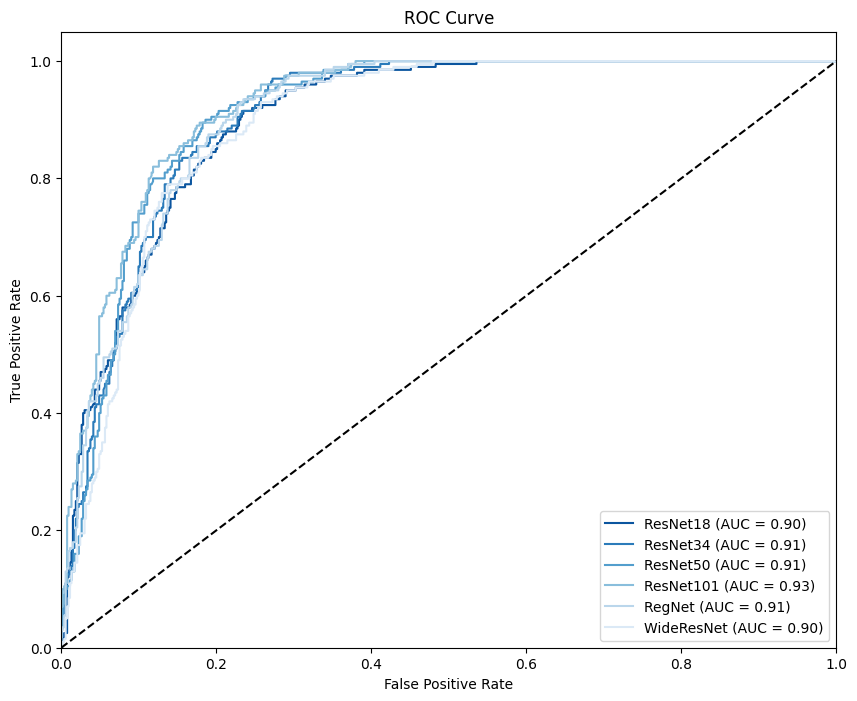

In [121]:
from sklearn.metrics import roc_curve, auc

# Get the true labels for your test data
true_labels = [label for (_, label) in dls.valid.dataset]

# Get the predicted probabilities for each class
probs_resnet18 = model_resnet18.get_preds(dl=dls.valid)[0].numpy()
probs_resnet34 = model_resnet34.get_preds(dl=dls.valid)[0].numpy()
probs_resnet50 = model_resnet50.get_preds(dl=dls.valid)[0].numpy()
probs_resnet101 = model_resnet101.get_preds(dl=dls.valid)[0].numpy()
probs_regnet = model_regnet.get_preds(dl=dls.valid)[0].numpy()
probs_wideresnet = model_wideresnet.get_preds(dl=dls.valid)[0].numpy()

# Compute the fpr, tpr, and thresholds for each class
fpr_resnet18, tpr_resnet18, thresholds_resnet18 = roc_curve(true_labels, probs_resnet18[:, 1], pos_label=1)
fpr_resnet34, tpr_resnet34, thresholds_resnet34 = roc_curve(true_labels, probs_resnet34[:, 1], pos_label=1)
fpr_resnet50, tpr_resnet50, thresholds_resnet50 = roc_curve(true_labels, probs_resnet50[:, 1], pos_label=1)
fpr_resnet101, tpr_resnet101, thresholds_resnet101 = roc_curve(true_labels, probs_resnet101[:, 1], pos_label=1)
fpr_regnet, tpr_regnet, thresholds_regnet = roc_curve(true_labels, probs_regnet[:, 1], pos_label=1)
fpr_wideresnet, tpr_wideresnet, thresholds_wideresnet = roc_curve(true_labels, probs_wideresnet[:, 1], pos_label=1)

# Compute the AUC scores for each class
auc_resnet18 = auc(fpr_resnet18, tpr_resnet18)
auc_resnet34 = auc(fpr_resnet34, tpr_resnet34)
auc_resnet50 = auc(fpr_resnet50, tpr_resnet50)
auc_resnet101 = auc(fpr_resnet101, tpr_resnet101)
auc_regnet = auc(fpr_regnet, tpr_regnet)
auc_wideresnet = auc(fpr_wideresnet, tpr_wideresnet)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_resnet18, tpr_resnet18, label=f'ResNet18 (AUC = {auc_resnet18:.2f})')
plt.plot(fpr_resnet34, tpr_resnet34, label=f'ResNet34 (AUC = {auc_resnet34:.2f})')
plt.plot(fpr_resnet50, tpr_resnet50, label=f'ResNet50 (AUC = {auc_resnet50:.2f})')
plt.plot(fpr_resnet101, tpr_resnet101, label=f'ResNet101 (AUC = {auc_resnet101:.2f})')
plt.plot(fpr_regnet, tpr_regnet, label=f'RegNet (AUC = {auc_regnet:.2f})')
plt.plot(fpr_wideresnet, tpr_wideresnet, label=f'WideResNet (AUC = {auc_wideresnet:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


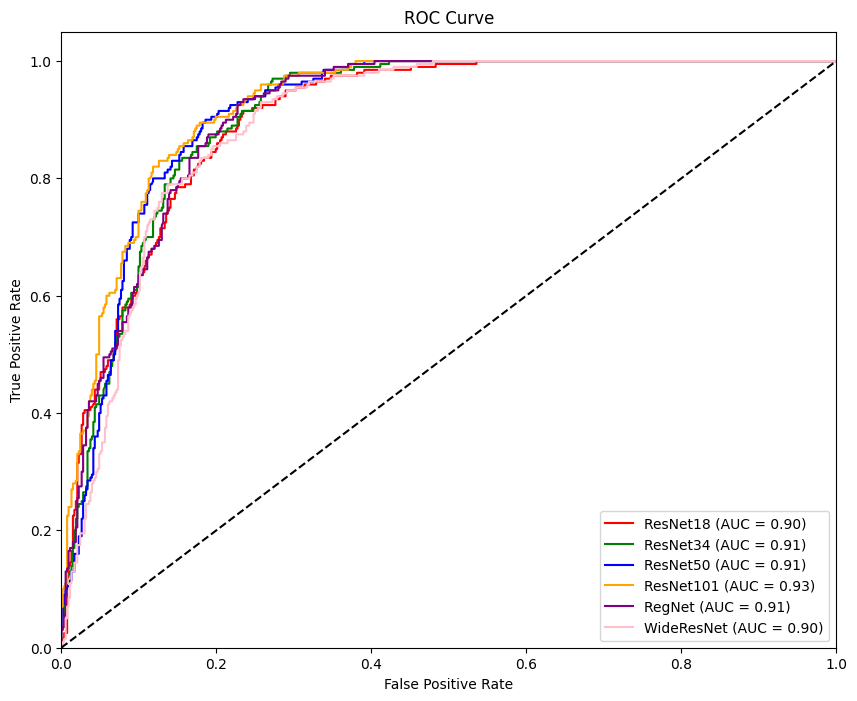

In [122]:
from sklearn.metrics import roc_curve, auc

# Get the true labels for your test data
true_labels = [label for (_, label) in dls.valid.dataset]

# Get the predicted probabilities for each class
probs_resnet18 = model_resnet18.get_preds(dl=dls.valid)[0].numpy()
probs_resnet34 = model_resnet34.get_preds(dl=dls.valid)[0].numpy()
probs_resnet50 = model_resnet50.get_preds(dl=dls.valid)[0].numpy()
probs_resnet101 = model_resnet101.get_preds(dl=dls.valid)[0].numpy()
probs_regnet = model_regnet.get_preds(dl=dls.valid)[0].numpy()
probs_wideresnet = model_wideresnet.get_preds(dl=dls.valid)[0].numpy()

# Compute the fpr, tpr, and thresholds for each class
fpr_resnet18, tpr_resnet18, thresholds_resnet18 = roc_curve(true_labels, probs_resnet18[:, 1], pos_label=1)
fpr_resnet34, tpr_resnet34, thresholds_resnet34 = roc_curve(true_labels, probs_resnet34[:, 1], pos_label=1)
fpr_resnet50, tpr_resnet50, thresholds_resnet50 = roc_curve(true_labels, probs_resnet50[:, 1], pos_label=1)
fpr_resnet101, tpr_resnet101, thresholds_resnet101 = roc_curve(true_labels, probs_resnet101[:, 1], pos_label=1)
fpr_regnet, tpr_regnet, thresholds_regnet = roc_curve(true_labels, probs_regnet[:, 1], pos_label=1)
fpr_wideresnet, tpr_wideresnet, thresholds_wideresnet = roc_curve(true_labels, probs_wideresnet[:, 1], pos_label=1)

# Compute the AUC scores for each class
auc_resnet18 = auc(fpr_resnet18, tpr_resnet18)
auc_resnet34 = auc(fpr_resnet34, tpr_resnet34)
auc_resnet50 = auc(fpr_resnet50, tpr_resnet50)
auc_resnet101 = auc(fpr_resnet101, tpr_resnet101)
auc_regnet = auc(fpr_regnet, tpr_regnet)
auc_wideresnet = auc(fpr_wideresnet, tpr_wideresnet)

# Set up colors for each ROC curve
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink']

# Plot the ROC curves with different colors
plt.figure(figsize=(10, 8))
plt.plot(fpr_resnet18, tpr_resnet18, label=f'ResNet18 (AUC = {auc_resnet18:.2f})', color=colors[0])
plt.plot(fpr_resnet34, tpr_resnet34, label=f'ResNet34 (AUC = {auc_resnet34:.2f})', color=colors[1])
plt.plot(fpr_resnet50, tpr_resnet50, label=f'ResNet50 (AUC = {auc_resnet50:.2f})', color=colors[2])
plt.plot(fpr_resnet101, tpr_resnet101, label=f'ResNet101 (AUC = {auc_resnet101:.2f})', color=colors[3])
plt.plot(fpr_regnet, tpr_regnet, label=f'RegNet (AUC = {auc_regnet:.2f})', color=colors[4])
plt.plot(fpr_wideresnet, tpr_wideresnet, label=f'WideResNet (AUC = {auc_wideresnet:.2f})', color=colors[5])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#shwetajs.lrn@gmail.com